In [4]:
import pprint

# Data libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Classifiers 
from sklearn.ensemble import RandomForestClassifier

# Analysis libs
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif


In [5]:
malware_data_filepath = '../datasets/Obfuscated/Obfuscated-MalMem2022_edited.csv'
malware_data = pd.read_csv(malware_data_filepath)

In [6]:
X_drop_columns = ['Class', 'Category', 'svcscan.interactive_process_services', 'handles.nport', 'pslist.nprocs64bit']
X = malware_data.drop(columns=X_drop_columns)

y_column = malware_data.Class
class_le = LabelEncoder()
y = class_le.fit_transform(y_column)

In [7]:
X

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,...,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
0,45,17,10.555556,202.844444,1694,38.500000,9129,212.302326,670,3161,...,138,389,221,26,24,116,121,87,0,8
1,47,19,11.531915,242.234043,2074,44.127660,11385,242.234043,840,3761,...,138,392,222,26,24,118,122,87,0,8
2,40,14,14.725000,288.225000,1932,48.300000,11529,288.225000,1050,3996,...,137,395,222,26,27,118,120,88,0,8
3,32,13,13.500000,264.281250,1445,45.156250,8457,264.281250,630,2961,...,138,395,222,26,27,118,120,88,0,8
4,42,16,11.452381,281.333333,2067,49.214286,11816,281.333333,908,3834,...,138,392,222,26,24,118,124,87,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,215.486487,1453,39.270270,7973,215.486487,630,2819,...,138,389,221,26,24,116,120,86,0,8
58592,37,14,9.945946,190.216216,1347,36.405405,7038,190.216216,603,2394,...,138,389,221,26,24,116,116,88,0,8
58593,38,15,9.842105,210.026316,1448,38.105263,7982,215.729730,624,2816,...,138,389,221,26,24,116,120,88,0,8
58594,37,15,10.243243,215.513513,1452,39.243243,7974,215.513513,632,2819,...,138,389,221,26,24,116,120,87,0,8


In [8]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
# c_transform = ColumnTransformer([
#     ('onehot', OneHotEncoder(), [0])
# ], remainder='passthrough')
# X = c_transform.fit_transform(X).astype(float)

In [10]:
# X

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [12]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (41017, 52)
y_train shape: (41017,)
X_test shape: (17579, 52)
y_test shape: (17579,)


In [13]:
rf = RandomForestClassifier(n_estimators=malware_data.shape[1], random_state=42)
clf = rf.fit(X_train,y_train)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9997155697138631


In [14]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[8785,    5],
       [   0, 8789]])

In [15]:
clf.classes_

array([0, 1])

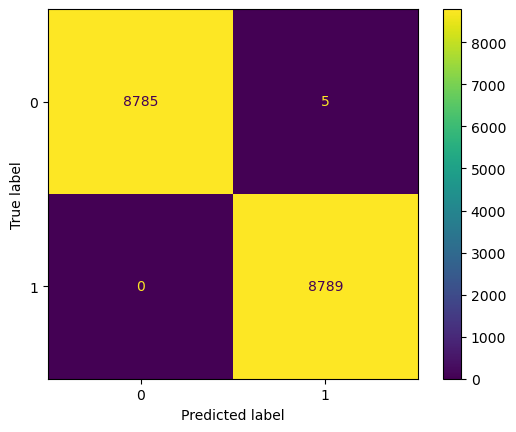

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [14]:
misclassified = np.where(y_test != y_pred)
print(len(misclassified[0]))

5


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8790
           1       1.00      1.00      1.00      8789

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



### results
the binary classification was strong for results as it had 100% of Accuracy, Precision, Recall, and F1-Score. We also removed the unnecessary features from the dataset and yet it had no effect on the results. Of course, we must be aware of a slight overfit to this model, but this has infact shown that it can define benign and malware memory data.  

In [17]:
scores = cross_val_score(clf, X, y, cv=10)

In [18]:
scores

array([0.9996587 , 1.        , 1.        , 1.        , 0.98976109,
       1.        , 0.99914661, 0.99982932, 1.        , 1.        ])

In [19]:
scores.mean()

0.998839572968165

In [20]:
scores.std()

0.003037156736516367